In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Part 3 ~ Faithful 
Linear regression with mini batch, stochastic GD

Text(0, 0.5, 'Time to next eruption (minutes)')

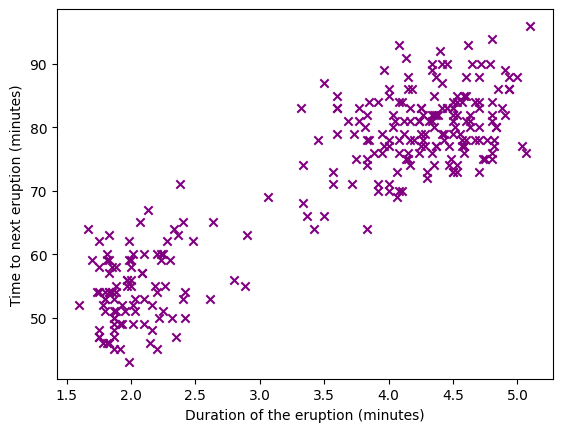

In [3]:
with open ('data\\faithful.txt', 'r') as f:
    data = f.readlines()
x = []
y = []
for line in data:
    line = line.split()
    x.append(float(line[0]))
    y.append(float(line[1]))
x = np.array(x)
y = np.array(y)
x = x.reshape(-1, 1)
y = y.reshape(-1, 1)
plt.scatter(x, y, color='purple', marker='x')
plt.xlabel('Duration of the eruption (minutes)')
plt.ylabel('Time to next eruption (minutes)')

In [4]:
h = lambda theta, X: np.dot(X, theta)
cost_computation = lambda theta, X, y: (1 / (2 * y.size)) * np.sum((h(theta, X) - y) ** 2)



def mini_batch_gd(theta, X, y, alpha, num_iters, batch_size):
    m = y.shape[0]  # number of training examples
    cost_history = np.zeros(num_iters)
    
    for i in range(num_iters):
        idx = np.random.randint(0, m, batch_size)
        X_batch = X[idx]
        y_batch = y[idx]
        
        predictions = h(theta, X_batch)
        errors = predictions - y_batch
        gradient = (1 / batch_size) * np.dot(X_batch.T, errors)
        theta -= alpha * gradient
        cost_history[i] = cost_computation(theta, X, y)
        
        if i % 100 == 0: 
            print(f"Iteration {i}: Cost {cost_history[i]}")
    
    return theta, cost_history

Iteration 0: Cost 1906.608055363889
Iteration 100: Cost 50.77638070486923
Iteration 200: Cost 45.28757260836979
Iteration 300: Cost 41.042691819742856
Iteration 400: Cost 36.784042364919515
Iteration 500: Cost 33.79798128786571
Iteration 600: Cost 31.096470162590563
Iteration 700: Cost 28.842591045821113
Iteration 800: Cost 27.313587765403252
Iteration 900: Cost 25.530467371750408
Iteration 1000: Cost 24.026181960439157
Iteration 1100: Cost 23.10133029309475
Iteration 1200: Cost 22.0610822571022
Iteration 1300: Cost 21.31253774899988
Iteration 1400: Cost 21.1514691073039
Iteration 1500: Cost 20.146657688723646
Iteration 1600: Cost 19.671152373725015
Iteration 1700: Cost 19.342202629357143
Iteration 1800: Cost 18.975160516512357
Iteration 1900: Cost 18.7949807099301


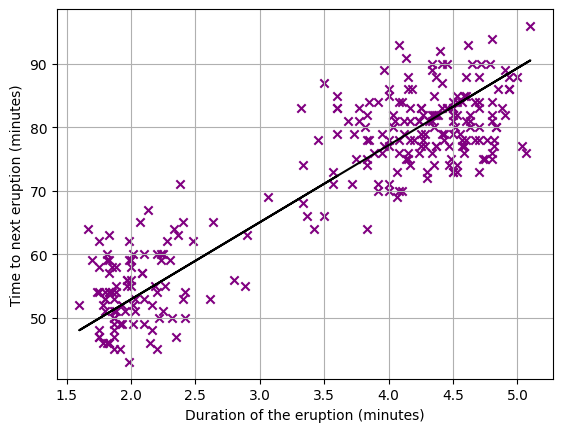

prediction for 2.1 duration : [54.08813222]
prediction for 3.5 duration : [71.10961905]
prediction for 5.2 duration : [91.77856736]


In [6]:
theta = np.zeros((2, 1))
alpha = 0.01  
num_iters = 2000 
mb = 16 # batch size

x_norm = (x - np.mean(x)) / np.std(x)
X = np.c_[np.ones(x.shape[0]), x]
 

theta, cost = mini_batch_gd(theta, X, y, alpha, num_iters, mb)

plt.figure()
plt.scatter(x, y, color='purple', marker='x')
plt.plot(x, h(theta, X), color='black')
plt.grid()
plt.xlabel('Duration of the eruption (minutes)')
plt.ylabel('Time to next eruption (minutes)')
plt.show()

def make_prediction(theta, time):
    return theta[0] + theta[1] * time

print(f'prediction for 2.1 duration : {make_prediction(theta, 2.1)}')
print(f'prediction for 3.5 duration : {make_prediction(theta, 3.5)}')
print(f'prediction for 5.2 duration : {make_prediction(theta, 5.2)}')